<a href="https://colab.research.google.com/github/viznuv/Pricing_models_dynamic/blob/main/Pricing_basic_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration |  Price  | Demand  | Multiplier
        0 |   10.00 |   90.00 |       1.08
        1 |   10.80 |   89.20 |       1.08
        2 |   10.78 |   89.22 |       1.08
        3 |   10.78 |   89.22 |       1.08
        4 |   10.78 |   89.22 |       1.08
        5 |   10.78 |   89.22 |       1.08
        6 |   10.78 |   89.22 |       1.08
        7 |   10.78 |   89.22 |       1.08
        8 |   10.78 |   89.22 |       1.08
        9 |   10.78 |   89.22 |       1.08
       10 |   10.78 |   89.22 |       1.08
       11 |   10.78 |   89.22 |       1.08
       12 |   10.78 |   89.22 |       1.08
       13 |   10.78 |   89.22 |       1.08
       14 |   10.78 |   89.22 |       1.08


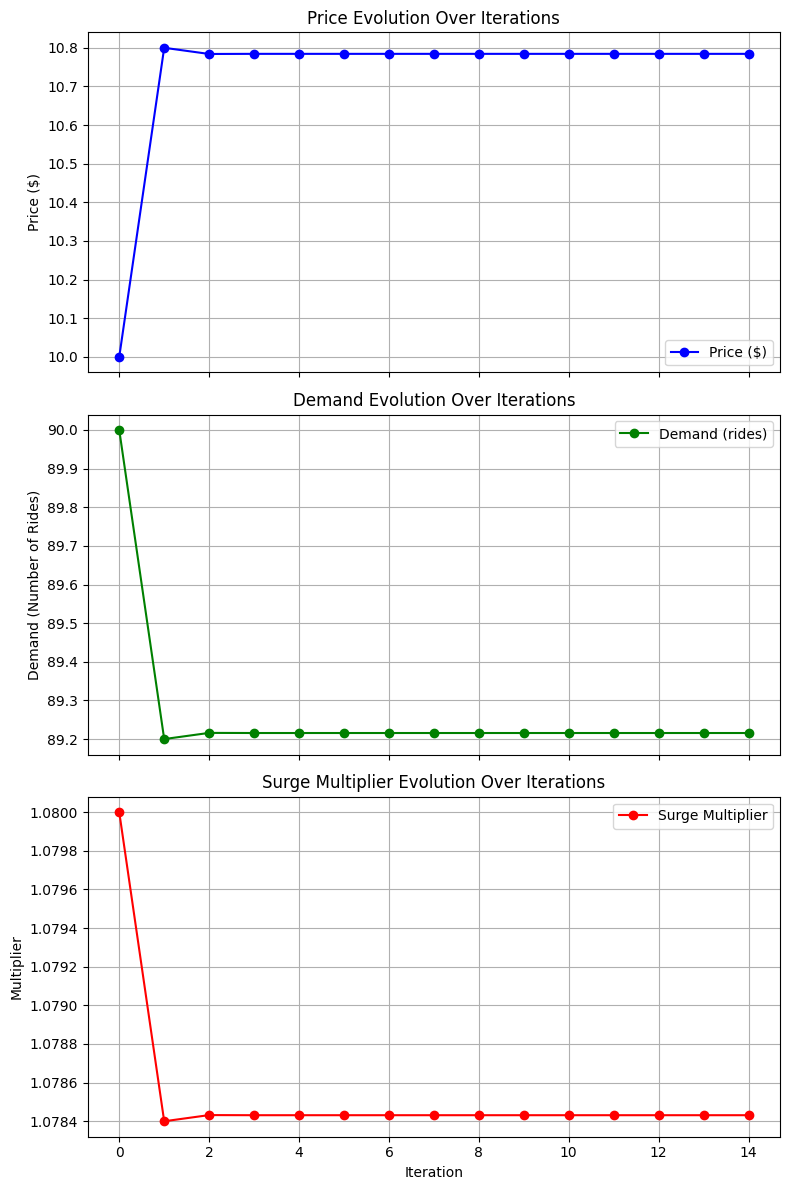

In [ ]:
import matplotlib.pyplot as plt

# Parameters
base_price = 10.0         # Base fare in dollars
a = 100                   # Maximum potential demand when price is zero
b = 1.0                   # Sensitivity of demand to price (linear drop-off)
supply = 50               # Number of available drivers
k = 0.1                   # Sensitivity parameter for surge multiplier

def demand(price):
    """
    Compute the expected demand based on the price.
    Demand decreases linearly with increasing price.
    """
    return max(0, a - b * price)

def surge_multiplier(current_demand, supply, k=0.1):
    """
    Determine the surge multiplier based on the current demand and available supply.
    No surge is applied if demand is less than or equal to supply.
    """
    if current_demand <= supply:
        return 1.0
    else:
        return 1.0 + k * ((current_demand - supply) / supply)

# Simulation settings
iterations = 15  # Number of iterations to simulate
prices = []
demands = []
multipliers = []

# Start simulation with the base price
current_price = base_price

print("Iteration |  Price  | Demand  | Multiplier")
for i in range(iterations):
    current_demand = demand(current_price)
    multiplier = surge_multiplier(current_demand, supply, k)
    new_price = base_price * multiplier  # Update the fare using the surge multiplier

    prices.append(current_price)
    demands.append(current_demand)
    multipliers.append(multiplier)

    print(f"{i:9d} | {current_price:7.2f} | {current_demand:7.2f} | {multiplier:10.2f}")

    # Update current_price for the next iteration.
    current_price = new_price

# Improved visualization using three subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
iterations_range = range(iterations)

# Plot for Price Evolution
axs[0].plot(iterations_range, prices, marker='o', color='blue', label='Price ($)')
axs[0].set_title("Price Evolution Over Iterations")
axs[0].set_ylabel("Price ($)")
axs[0].grid(True)
axs[0].legend()

# Plot for Demand Evolution
axs[1].plot(iterations_range, demands, marker='o', color='green', label='Demand (rides)')
axs[1].set_title("Demand Evolution Over Iterations")
axs[1].set_ylabel("Demand (Number of Rides)")
axs[1].grid(True)
axs[1].legend()

# Plot for Surge Multiplier Evolution
axs[2].plot(iterations_range, multipliers, marker='o', color='red', label='Surge Multiplier')
axs[2].set_title("Surge Multiplier Evolution Over Iterations")
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("Multiplier")
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


Iteration |  Price  | Demand  | Multiplier
        0 |   10.00 |   90.00 |       1.08
        1 |   10.80 |   89.20 |       1.08
        2 |   10.78 |   89.22 |       1.08
        3 |   10.78 |   89.22 |       1.08
        4 |   10.78 |   89.22 |       1.08
        5 |   10.78 |   89.22 |       1.08
        6 |   10.78 |   89.22 |       1.08
        7 |   10.78 |   89.22 |       1.08
        8 |   10.78 |   89.22 |       1.08
        9 |   10.78 |   89.22 |       1.08


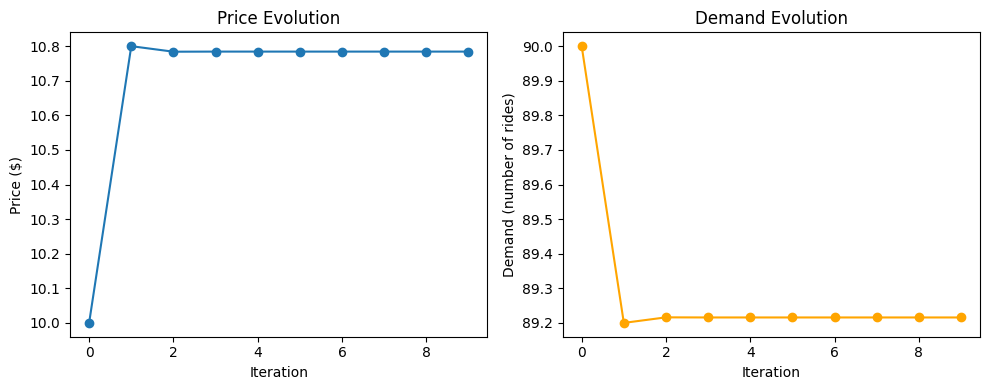

In [ ]:
import matplotlib.pyplot as plt

# Parameters
base_price = 10.0         # Base fare in dollars
a = 100                   # Maximum potential demand (when price is zero)
b = 1.0                   # Sensitivity of demand to price (linear drop-off)
supply = 50               # Number of available drivers
k = 0.1                   # Sensitivity of surge multiplier to the excess demand

def demand(price):
    """
    Simple linear demand function: as price increases, demand decreases.
    Demand is capped at zero on the lower end.
    """
    return max(0, a - b * price)

def surge_multiplier(current_demand, supply, k=0.1):
    """
    Calculate the surge multiplier based on the difference between demand and supply.
    If demand is less than or equal to supply, no surge is applied (multiplier = 1).
    If demand exceeds supply, the multiplier increases linearly.
    """
    if current_demand <= supply:
        return 1.0
    else:
        return 1.0 + k * ((current_demand - supply) / supply)

# We'll simulate how the surge pricing model adjusts the fare over a series of iterations.
iterations = 10
prices = []
demands = []
multipliers = []

# Start with the base price
current_price = base_price

print("Iteration |  Price  | Demand  | Multiplier")
for i in range(iterations):
    current_demand = demand(current_price)
    multiplier = surge_multiplier(current_demand, supply, k)
    new_price = base_price * multiplier  # New fare based on surge multiplier

    prices.append(current_price)
    demands.append(current_demand)
    multipliers.append(multiplier)

    print(f"{i:9d} | {current_price:7.2f} | {current_demand:7.2f} | {multiplier:10.2f}")

    # Update current_price for the next iteration.
    # In a real model, you might iterate until you reach an equilibrium.
    current_price = new_price

# Plotting the evolution of price and demand
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(prices, marker='o')
plt.title("Price Evolution")
plt.xlabel("Iteration")
plt.ylabel("Price ($)")

plt.subplot(1, 2, 2)
plt.plot(demands, marker='o', color='orange')
plt.title("Demand Evolution")
plt.xlabel("Iteration")
plt.ylabel("Demand (number of rides)")

plt.tight_layout()
plt.show()


Iteration |  Price  | Demand  |  Supply  | Multiplier
        0 |   10.00 |   90.00 |    50.00 |       1.08
        1 |   10.80 |   89.20 |    51.20 |       1.07
        2 |   10.74 |   89.26 |    51.95 |       1.07
        3 |   10.72 |   89.28 |    52.44 |       1.07
        4 |   10.70 |   89.30 |    52.76 |       1.07
        5 |   10.69 |   89.31 |    52.97 |       1.07
        6 |   10.69 |   89.31 |    53.11 |       1.07
        7 |   10.68 |   89.32 |    53.20 |       1.07
        8 |   10.68 |   89.32 |    53.26 |       1.07
        9 |   10.68 |   89.32 |    53.30 |       1.07
       10 |   10.68 |   89.32 |    53.32 |       1.07
       11 |   10.68 |   89.32 |    53.34 |       1.07
       12 |   10.67 |   89.33 |    53.35 |       1.07
       13 |   10.67 |   89.33 |    53.36 |       1.07
       14 |   10.67 |   89.33 |    53.36 |       1.07
       15 |   10.67 |   89.33 |    53.36 |       1.07
       16 |   10.67 |   89.33 |    53.37 |       1.07
       17 |   10.67 |   89.3

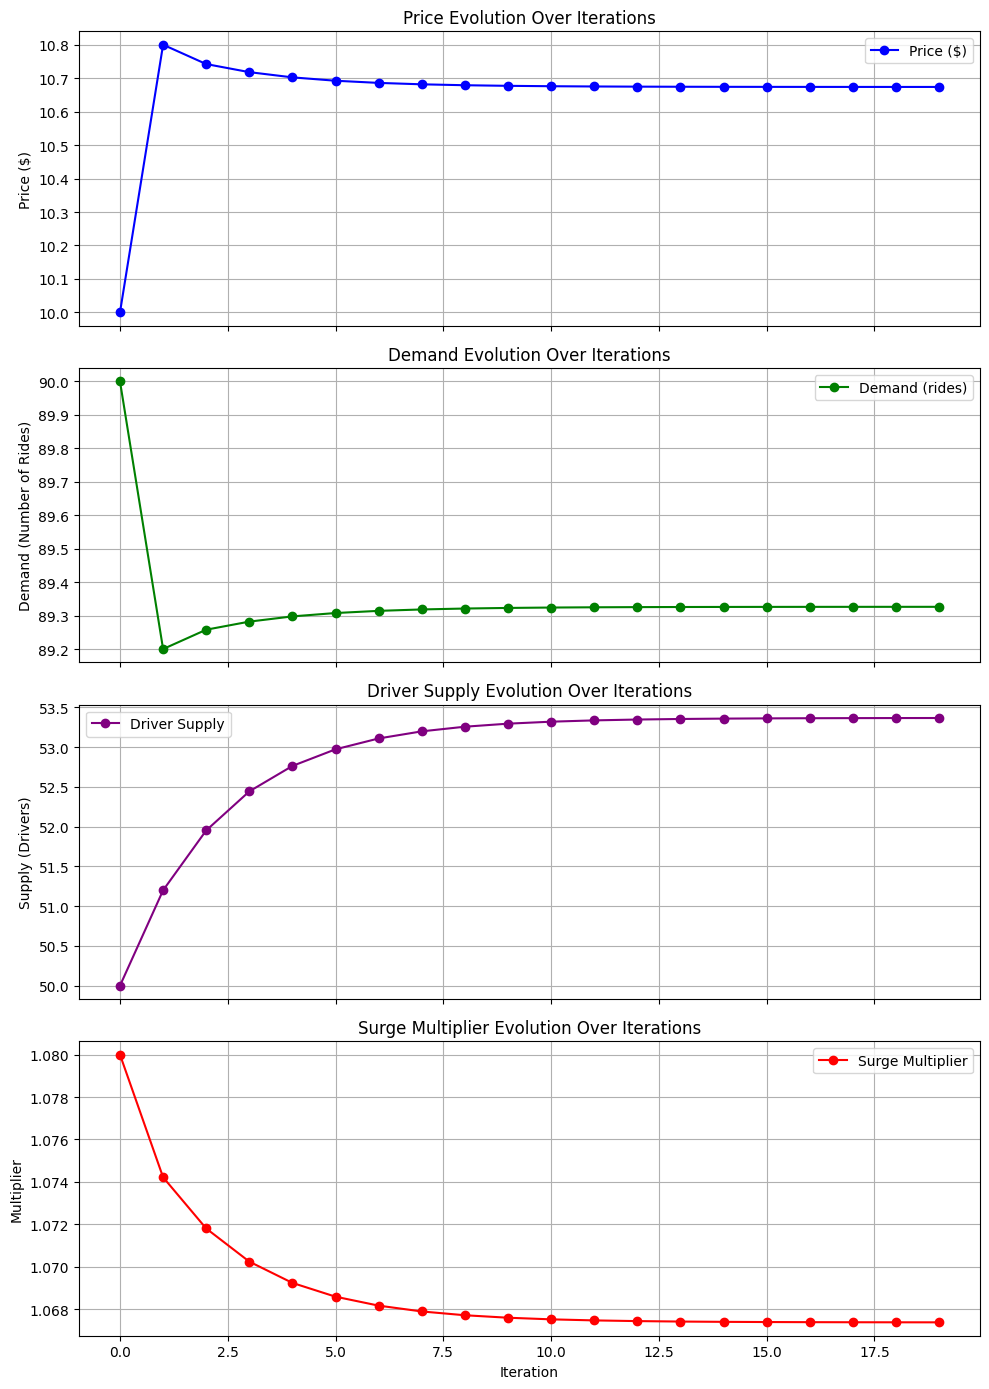

In [ ]:
import matplotlib.pyplot as plt

# --- Parameters ---
base_price = 10.0      # Base fare in dollars
a = 100.0              # Maximum potential demand when price is zero
b = 1.0                # Demand sensitivity to price (linear drop-off)

base_supply = 50.0     # Baseline number of available drivers when surge multiplier is 1
k = 0.1                # Surge sensitivity: determines how aggressively surge responds to imbalance
r = 0.3                # Supply adjustment rate: how quickly driver availability reacts

# --- Functions ---
def demand(price):
    """Demand decreases linearly with price."""
    return max(0, a - b * price)

def surge_multiplier(current_demand, current_supply, k=0.1):
    """
    Calculate surge multiplier based on the imbalance between demand and supply.
    If demand <= supply, multiplier is 1.0.
    Otherwise, it increases linearly with the excess demand.
    """
    if current_demand <= current_supply:
        return 1.0
    else:
        return 1.0 + k * ((current_demand - current_supply) / current_supply)

# --- Simulation Setup ---
iterations = 20  # Number of simulation steps
prices = []        # Record of prices over time
demands = []       # Record of demands over time
supplies = []      # Record of driver supply over time
multipliers = []   # Record of surge multipliers

# Initialize simulation variables
current_price = base_price
current_supply = base_supply

print("Iteration |  Price  | Demand  |  Supply  | Multiplier")
for i in range(iterations):
    # Calculate current demand based on price
    current_demand = demand(current_price)

    # Determine surge multiplier based on current imbalance
    current_multiplier = surge_multiplier(current_demand, current_supply, k)

    # Update price based on surge multiplier
    new_price = base_price * current_multiplier

    # Determine the desired supply (incentivized by surge multiplier)
    desired_supply = base_supply * current_multiplier

    # Update supply gradually toward desired supply
    new_supply = current_supply + r * (desired_supply - current_supply)

    # Record the values for visualization
    prices.append(current_price)
    demands.append(current_demand)
    supplies.append(current_supply)
    multipliers.append(current_multiplier)

    print(f"{i:9d} | {current_price:7.2f} | {current_demand:7.2f} | {current_supply:8.2f} | {current_multiplier:10.2f}")

    # Prepare for next iteration
    current_price = new_price
    current_supply = new_supply

# --- Visualization ---
fig, axs = plt.subplots(4, 1, figsize=(10, 14), sharex=True)
iter_range = range(iterations)

# Price Evolution
axs[0].plot(iter_range, prices, marker='o', color='blue', label='Price ($)')
axs[0].set_title("Price Evolution Over Iterations")
axs[0].set_ylabel("Price ($)")
axs[0].grid(True)
axs[0].legend()

# Demand Evolution
axs[1].plot(iter_range, demands, marker='o', color='green', label='Demand (rides)')
axs[1].set_title("Demand Evolution Over Iterations")
axs[1].set_ylabel("Demand (Number of Rides)")
axs[1].grid(True)
axs[1].legend()

# Supply Evolution
axs[2].plot(iter_range, supplies, marker='o', color='purple', label='Driver Supply')
axs[2].set_title("Driver Supply Evolution Over Iterations")
axs[2].set_ylabel("Supply (Drivers)")
axs[2].grid(True)
axs[2].legend()

# Surge Multiplier Evolution
axs[3].plot(iter_range, multipliers, marker='o', color='red', label='Surge Multiplier')
axs[3].set_title("Surge Multiplier Evolution Over Iterations")
axs[3].set_xlabel("Iteration")
axs[3].set_ylabel("Multiplier")
axs[3].grid(True)
axs[3].legend()

plt.tight_layout()
plt.show()


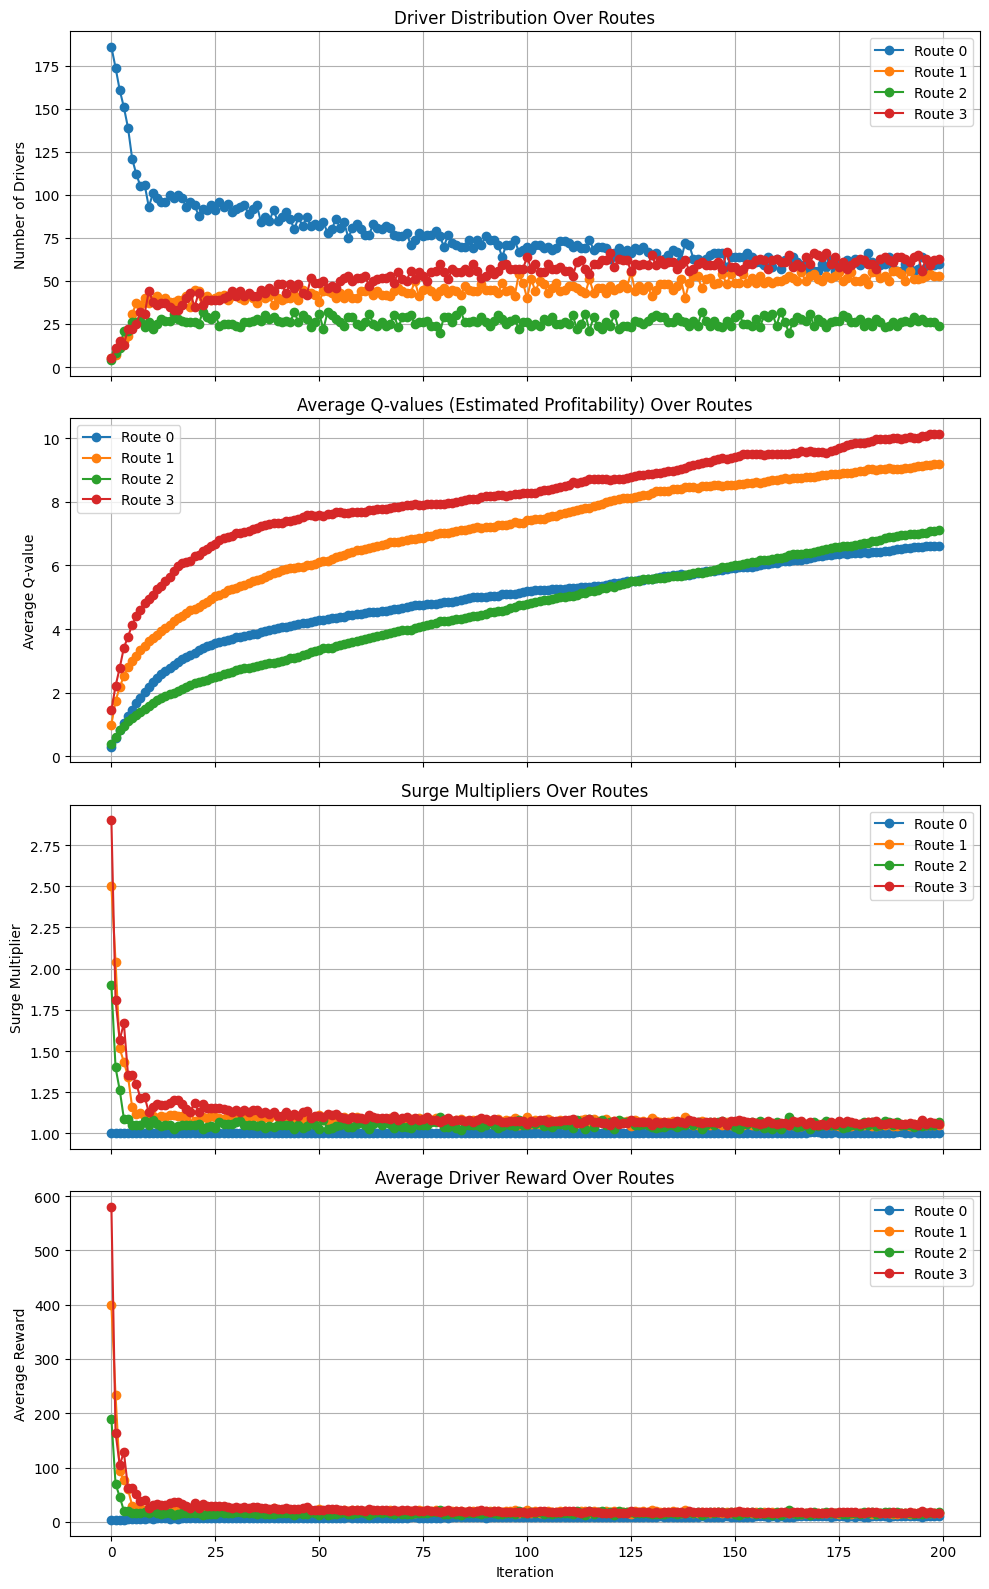

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Environment and RL Parameters -----
num_routes = 4
num_drivers = 200      # total drivers (each is an independent RL agent)
iterations = 200       # total simulation iterations

base_price = 10.0      # base fare in dollars
k = 0.1                # surge sensitivity parameter

# Fixed consumer demand per route (consumers do not switch routes)
# You can adjust these numbers to represent different market sizes per route.
route_demands = np.array([60, 80, 40, 100], dtype=float)

# Q-learning parameters for drivers (multi-armed bandit problem)
alpha = 0.1            # learning rate
epsilon = 0.1          # exploration rate

# Initialize Q-values for each driver for each route (shape: num_drivers x num_routes)
Q = np.zeros((num_drivers, num_routes))

# ----- Data Recording for Visualization -----
driver_counts_over_time = np.zeros((iterations, num_routes))  # supply per route each iteration
avg_Q_over_time = np.zeros((iterations, num_routes))          # average Q-value per route
surge_multiplier_over_time = np.zeros((iterations, num_routes)) # surge multiplier per route
avg_reward_over_time = np.zeros((iterations, num_routes))       # average reward per route

# ----- Simulation Loop -----
for t in range(iterations):
    # Each driver selects a route using an epsilon-greedy policy.
    # actions: array of chosen route indices for each driver.
    actions = np.zeros(num_drivers, dtype=int)
    for i in range(num_drivers):
        if np.random.rand() < epsilon:
            # Explore: choose a random route.
            actions[i] = np.random.choice(num_routes)
        else:
            # Exploit: choose the route with the highest Q-value.
            actions[i] = np.argmax(Q[i])

    # Compute driver supply on each route.
    supply = np.array([np.sum(actions == r) for r in range(num_routes)], dtype=float)

    # Calculate surge multipliers and prices for each route.
    surge_multiplier = np.zeros(num_routes)
    price = np.zeros(num_routes)
    for r in range(num_routes):
        if supply[r] > 0:
            if supply[r] >= route_demands[r]:
                surge_multiplier[r] = 1.0
            else:
                surge_multiplier[r] = 1.0 + k * ((route_demands[r] - supply[r]) / supply[r])
        else:
            # If no driver chose the route, assign a high surge multiplier as a fallback.
            surge_multiplier[r] = 1.0 + k * route_demands[r]
        price[r] = base_price * surge_multiplier[r]

    # Compute rewards for each driver based on the route they chose.
    # Reward for a driver on route r is defined as:
    #   reward = price[r] * (route_demands[r] / supply[r])
    # (If supply[r] is 0, no driver chose that route so no update is needed.)
    rewards = np.zeros(num_drivers)
    for r in range(num_routes):
        if supply[r] > 0:
            reward_r = price[r] * (route_demands[r] / supply[r])
            rewards[actions == r] = reward_r
        else:
            # In the unlikely event that supply[r] == 0, no driver receives a reward.
            rewards[actions == r] = 0.0

    # Each driver updates their Q-value for the chosen route using the Q-learning update rule.
    for i in range(num_drivers):
        chosen_route = actions[i]
        Q[i, chosen_route] = Q[i, chosen_route] + alpha * (rewards[i] - Q[i, chosen_route])

    # Record data for visualization.
    driver_counts_over_time[t] = supply
    avg_Q_over_time[t] = np.mean(Q, axis=0)
    surge_multiplier_over_time[t] = surge_multiplier
    for r in range(num_routes):
        if supply[r] > 0:
            avg_reward_over_time[t, r] = np.mean(rewards[actions == r])
        else:
            avg_reward_over_time[t, r] = np.nan

# ----- Visualization -----
fig, axs = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
time_axis = np.arange(iterations)

# 1. Plot: Distribution of Drivers per Route Over Time
for r in range(num_routes):
    axs[0].plot(time_axis, driver_counts_over_time[:, r], marker='o', label=f'Route {r}')
axs[0].set_title("Driver Distribution Over Routes")
axs[0].set_ylabel("Number of Drivers")
axs[0].legend()
axs[0].grid(True)

# 2. Plot: Average Q-values for Each Route Over Time
for r in range(num_routes):
    axs[1].plot(time_axis, avg_Q_over_time[:, r], marker='o', label=f'Route {r}')
axs[1].set_title("Average Q-values (Estimated Profitability) Over Routes")
axs[1].set_ylabel("Average Q-value")
axs[1].legend()
axs[1].grid(True)

# 3. Plot: Surge Multipliers Over Routes Over Time
for r in range(num_routes):
    axs[2].plot(time_axis, surge_multiplier_over_time[:, r], marker='o', label=f'Route {r}')
axs[2].set_title("Surge Multipliers Over Routes")
axs[2].set_ylabel("Surge Multiplier")
axs[2].legend()
axs[2].grid(True)

# 4. Plot: Average Reward per Route Over Time
for r in range(num_routes):
    axs[3].plot(time_axis, avg_reward_over_time[:, r], marker='o', label=f'Route {r}')
axs[3].set_title("Average Driver Reward Over Routes")
axs[3].set_xlabel("Iteration")
axs[3].set_ylabel("Average Reward")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


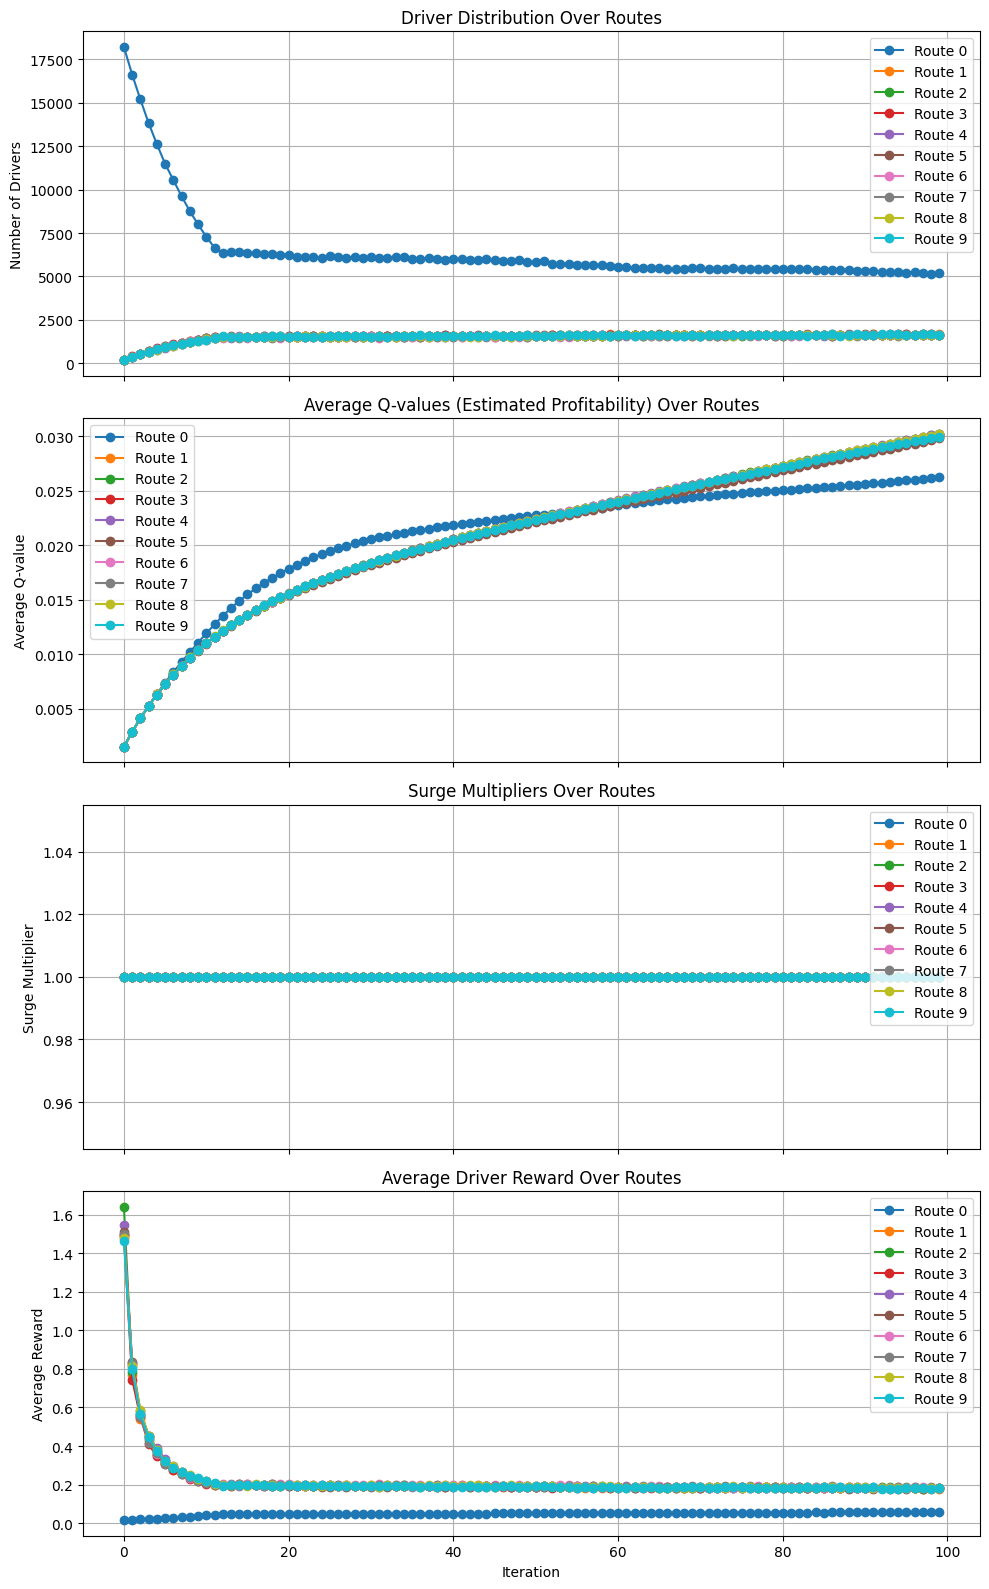

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==================== Adjustable Parameters ====================
num_routes = 10      # Number of routes (adjustable)
num_drivers = 20000    # Number of drivers (RL agents) (adjustable)
total_riders = 300   # Total number of riders across all routes (adjustable)
iterations = 100     # Number of simulation iterations

# Core parameters for pricing and RL
base_price = 10.0    # Base fare in dollars
k = 0.1              # Surge sensitivity parameter

# Q-learning parameters
alpha = 0.1          # Learning rate for Q-value updates
epsilon = 0.1        # Exploration rate for epsilon-greedy policy

# ==================== Setup Consumer Demand ====================
# Fixed consumer demand per route.
# Here we distribute the total_riders equally among the routes.
route_demands = np.full(num_routes, total_riders / num_routes)

# ==================== Initialize RL Agent Q-values ====================
# Each driver maintains Q-values for each route.
Q = np.zeros((num_drivers, num_routes))

# ==================== Data Storage for Visualization ====================
driver_counts_over_time = np.zeros((iterations, num_routes))  # Driver supply per route
avg_Q_over_time = np.zeros((iterations, num_routes))          # Average Q-values per route
surge_multiplier_over_time = np.zeros((iterations, num_routes)) # Surge multipliers per route
avg_reward_over_time = np.zeros((iterations, num_routes))       # Average rewards per route

# ==================== Simulation Loop ====================
for t in range(iterations):
    # Each driver selects a route using an epsilon-greedy strategy.
    actions = np.zeros(num_drivers, dtype=int)
    for i in range(num_drivers):
        if np.random.rand() < epsilon:
            actions[i] = np.random.choice(num_routes)  # Explore
        else:
            actions[i] = np.argmax(Q[i])               # Exploit

    # Compute driver supply for each route.
    supply = np.array([np.sum(actions == r) for r in range(num_routes)], dtype=float)

    # Compute surge multiplier and price for each route.
    surge_multiplier = np.zeros(num_routes)
    price = np.zeros(num_routes)
    for r in range(num_routes):
        if supply[r] > 0:
            if supply[r] >= route_demands[r]:
                surge_multiplier[r] = 1.0
            else:
                surge_multiplier[r] = 1.0 + k * ((route_demands[r] - supply[r]) / supply[r])
        else:
            # Fallback: If no driver chose the route, use a high multiplier.
            surge_multiplier[r] = 1.0 + k * route_demands[r]
        price[r] = base_price * surge_multiplier[r]

    # Calculate rewards for each driver based on the chosen route.
    # Reward is proportional to the route price and inversely related to driver competition.
    rewards = np.zeros(num_drivers)
    for r in range(num_routes):
        if supply[r] > 0:
            reward_r = price[r] * (route_demands[r] / supply[r])
            rewards[actions == r] = reward_r
        else:
            rewards[actions == r] = 0.0

    # Q-learning update: each driver updates the Q-value for the chosen route.
    for i in range(num_drivers):
        chosen_route = actions[i]
        Q[i, chosen_route] = Q[i, chosen_route] + alpha * (rewards[i] - Q[i, chosen_route])

    # Record data for visualization.
    driver_counts_over_time[t] = supply
    avg_Q_over_time[t] = np.mean(Q, axis=0)
    surge_multiplier_over_time[t] = surge_multiplier
    for r in range(num_routes):
        if supply[r] > 0:
            avg_reward_over_time[t, r] = np.mean(rewards[actions == r])
        else:
            avg_reward_over_time[t, r] = np.nan

# ==================== Visualization ====================
fig, axs = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
time_axis = np.arange(iterations)

# 1. Driver Distribution Over Routes
for r in range(num_routes):
    axs[0].plot(time_axis, driver_counts_over_time[:, r], marker='o', label=f'Route {r}')
axs[0].set_title("Driver Distribution Over Routes")
axs[0].set_ylabel("Number of Drivers")
axs[0].legend()
axs[0].grid(True)

# 2. Average Q-values for Each Route
for r in range(num_routes):
    axs[1].plot(time_axis, avg_Q_over_time[:, r], marker='o', label=f'Route {r}')
axs[1].set_title("Average Q-values (Estimated Profitability) Over Routes")
axs[1].set_ylabel("Average Q-value")
axs[1].legend()
axs[1].grid(True)

# 3. Surge Multipliers for Each Route
for r in range(num_routes):
    axs[2].plot(time_axis, surge_multiplier_over_time[:, r], marker='o', label=f'Route {r}')
axs[2].set_title("Surge Multipliers Over Routes")
axs[2].set_ylabel("Surge Multiplier")
axs[2].legend()
axs[2].grid(True)

# 4. Average Driver Reward per Route
for r in range(num_routes):
    axs[3].plot(time_axis, avg_reward_over_time[:, r], marker='o', label=f'Route {r}')
axs[3].set_title("Average Driver Reward Over Routes")
axs[3].set_xlabel("Iteration")
axs[3].set_ylabel("Average Reward")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()
